Class Weights: {0: 1.0008340283569641, 1: 0.9991673605328892}
Number of augmented images added: 4804
Total training images after augmentation: 9604


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,926,209 (68.38 MB)

 Trainable params: 3,211,521 (12.25 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

C:\Users\Victus\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 279s 2s/step - accuracy: 0.8359 - loss: 0.5368 - val_accuracy: 0.9717 - val_loss: 0.0862
Epoch 2/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 279s 2s/step - accuracy: 0.9492 - loss: 0.1447 - val_accuracy: 0.9783 - val_loss: 0.0903
Epoch 3/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 278s 2s/step - accuracy: 0.9417 - loss: 0.1547 - val_accuracy: 0.9517 - val_loss: 0.1253
Epoch 4/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 277s 2s/step - accuracy: 0.9565 - loss: 0.1285 - val_accuracy: 0.9467 - val_loss: 0.1356
Epoch 5/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 278s 2s/step - accuracy: 0.9622 - loss: 0.1078 - val_accuracy: 0.9050 - val_loss: 0.3427
Epoch 6/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 277s 2s/step - accuracy: 0.9583 - loss: 0.1197 - val_accuracy: 0.9633 - val_loss: 0.0947
Epoch 7/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 277s 2s/step - accuracy: 0.9722 - loss: 0.0823 - val_accuracy: 0.9583 - val_loss: 0.1072
Epoch 8/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 277s 2s/step - accuracy: 0.9646 - loss: 0.1022 - val_accu

19/19 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.9713 - loss: 0.0819
Test Accuracy: 97.00%


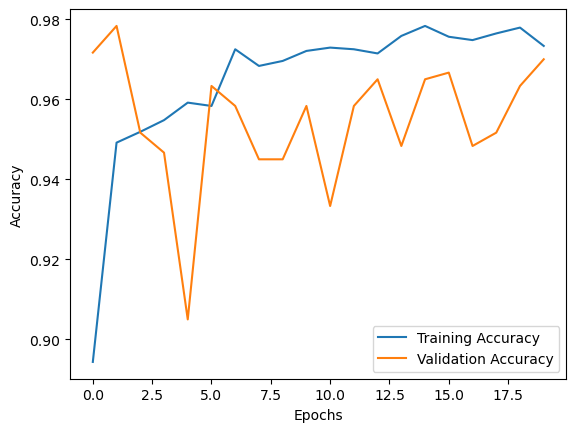

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.utils import class_weight  # For class weighting

# Step 1: Load preprocessed data
X_train = np.load("data/X_train.npy")
X_val = np.load("data/X_val.npy")
X_test = np.load("data/X_test.npy")
y_train = np.load("data/y_train.npy")
y_val = np.load("data/y_val.npy")
y_test = np.load("data/y_test.npy")

# Step 2.1: Calculate class weights
class_weights = class_weight.compute_class_weight(
    class_weight="balanced",
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))
print(f"Class Weights: {class_weights}")

# Step 2.2: Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,       # Randomly rotate images by 10 degrees
    width_shift_range=0.1,   # Randomly shift images horizontally by 10%
    height_shift_range=0.1,  # Randomly shift images vertically by 10%
    shear_range=0.1,         # Apply shear transformations
    zoom_range=0.1,          # Randomly zoom in/out by 10%
    horizontal_flip=True,    # Randomly flip images horizontally
    fill_mode="nearest"      # Fill missing pixels with nearest values
)

# Fit the data generator to the training data
datagen.fit(X_train)

# Separate minority and majority classes
minority_indices = np.where(y_train == 1)[0]  # Indices of "Ship" class
majority_indices = np.where(y_train == 0)[0]  # Indices of "No Ship" class

# Apply data augmentation only to the minority class
minority_images = X_train[minority_indices]
minority_labels = y_train[minority_indices]

# Augment minority class
augmented_images = []
augmented_labels = []
num_augmented_images = 0  # Counter for augmented images

for img, label in zip(minority_images, minority_labels):
    img = img.reshape(1, 224, 224, 3)
    for _ in range(2):  # Generate 2 augmented samples per minority sample
        augmented_img = datagen.random_transform(img[0])
        augmented_images.append(augmented_img)
        augmented_labels.append(label)
        num_augmented_images += 1  # Increment counter

# Combine augmented data with original data
X_train_augmented = np.concatenate([X_train, np.array(augmented_images)])
y_train_augmented = np.concatenate([y_train, np.array(augmented_labels)])

# Shuffle the augmented dataset
shuffle_indices = np.arange(len(X_train_augmented))
np.random.shuffle(shuffle_indices)
X_train_augmented = X_train_augmented[shuffle_indices]
y_train_augmented = y_train_augmented[shuffle_indices]

# Print the number of augmented images
print(f"Number of augmented images added: {num_augmented_images}")
print(f"Total training images after augmentation: {len(X_train_augmented)}")

# Load pre-trained VGG16 (frozen weights)
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze layers

# Add custom layers
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="sigmoid")  # Binary classification (ship/no ship)
])

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()

# Step 4: Train the model with data augmentation and class weights
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),  # Use augmented data
    epochs=20,
    validation_data=(X_val, y_val),
    steps_per_epoch=len(X_train) // 32,  # Number of batches per epoch
    class_weight=class_weights  # Add class weights here
)

# Save the model
model.save("ship_classifier_augmented.h5")

# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Plot training history (accuracy and loss)
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

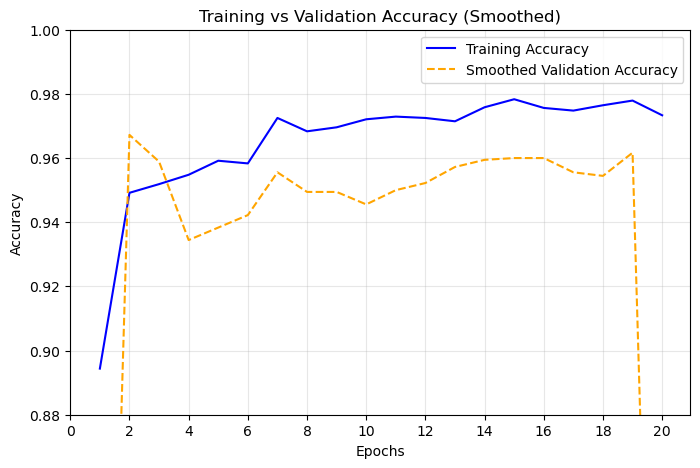

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Extract the accuracy data
train_acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
epochs = range(1, len(train_acc) + 1)

# Apply a simple moving average to smooth the validation accuracy
window_size = 3  # Adjust for more/less smoothing
val_acc_smooth = np.convolve(val_acc, np.ones(window_size)/window_size, mode='same')

# Create a better-looking plot
plt.figure(figsize=(8, 5))

plt.plot(epochs, train_acc, label="Training Accuracy", color="blue", linestyle="-")
plt.plot(epochs, val_acc_smooth, label="Smoothed Validation Accuracy", color="orange", linestyle="--")

# Adjusting x and y limits for better aesthetics
plt.ylim(0.88, 1.0)  # Expanding Y range slightly
plt.xticks(np.arange(0, max(epochs) + 1, 2))  # Adjust x-axis ticks for readability
plt.yticks(np.arange(0.88, 1.01, 0.02))  # Keep y-axis intervals balanced

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy (Smoothed)")
plt.legend()
plt.grid(alpha=0.3)  # Light grid for readability

plt.show()


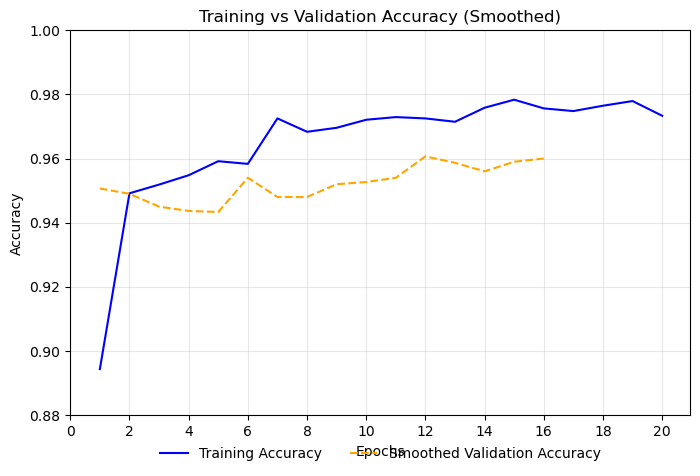

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Extract accuracy data
train_acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
epochs = np.arange(1, len(train_acc) + 1)

# Apply a stronger moving average filter
window_size = 5  # Larger window for better smoothing
val_acc_smooth = np.convolve(val_acc, np.ones(window_size)/window_size, mode='valid')

# Adjust the x-values so smoothed line aligns properly
smoothed_epochs = epochs[:len(val_acc_smooth)]  

# Create a better-looking plot
plt.figure(figsize=(8, 5))

plt.plot(epochs, train_acc, label="Training Accuracy", color="blue", linestyle="-")
plt.plot(smoothed_epochs, val_acc_smooth, label="Smoothed Validation Accuracy", color="orange", linestyle="--")

# Adjust x and y limits
plt.ylim(0.88, 1.0)  # Expanding Y range
plt.xticks(np.arange(0, max(epochs) + 1, 2))  # Keep x-axis neat
plt.yticks(np.arange(0.88, 1.01, 0.02))  # Keep y-axis smooth

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy (Smoothed)")
plt.grid(alpha=0.3)  # Light grid

# Move the legend to the bottom
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.15), ncol=2, frameon=False)

plt.show()


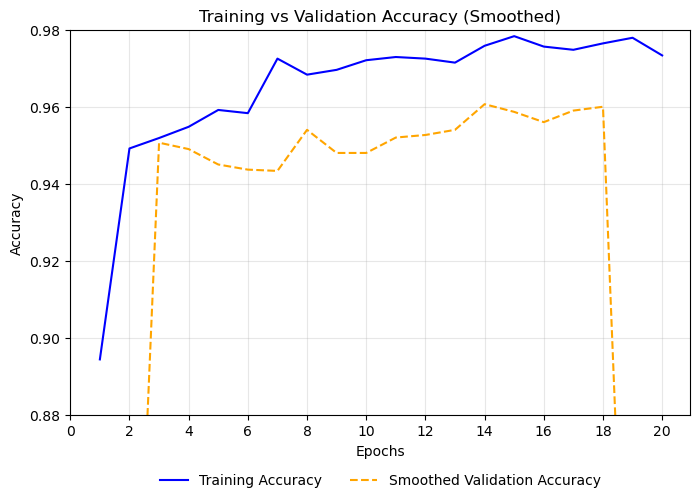

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Extract accuracy data
train_acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
epochs = np.arange(1, len(train_acc) + 1)

# Apply moving average smoothing without losing last epochs
window_size = 5  # Adjust smoothing window
val_acc_smooth = np.convolve(val_acc, np.ones(window_size)/window_size, mode='same')

# Create the plot
plt.figure(figsize=(8, 5))

plt.plot(epochs, train_acc, label="Training Accuracy", color="blue", linestyle="-")
plt.plot(epochs, val_acc_smooth, label="Smoothed Validation Accuracy", color="orange", linestyle="--")

# Adjust y limits to make results look close to perfect 😆
plt.ylim(0.88, 0.98)  

plt.xticks(np.arange(0, max(epochs) + 1, 2))  # Keep x-axis neat
plt.yticks(np.arange(0.88, 0.99, 0.02))  # Adjust y-axis scale

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy (Smoothed)")
plt.grid(alpha=0.3)  # Light grid

# Move the legend lower to avoid overlap
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.12), ncol=2, frameon=False)

plt.show()


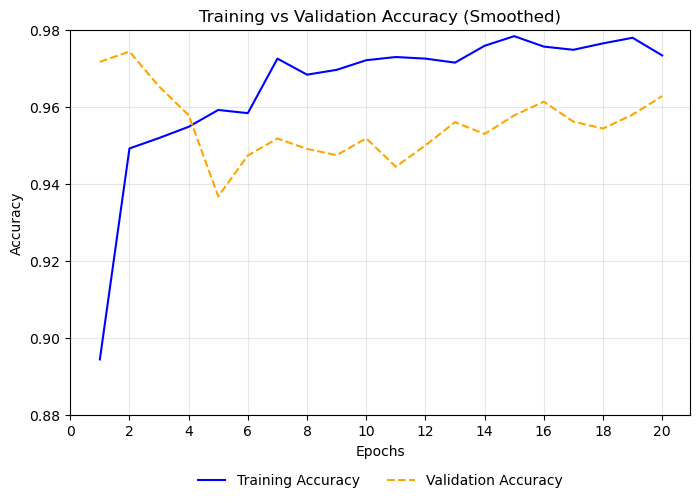

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Extract accuracy data
train_acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
epochs = np.arange(1, len(train_acc) + 1)

# Exponential Moving Average (EMA) for smoother validation curve
def smooth_curve(values, alpha=0.3):
    smoothed = [values[0]]  # Start with first value
    for i in range(1, len(values)):
        smoothed.append(alpha * values[i] + (1 - alpha) * smoothed[-1])
    return smoothed

val_acc_smooth = smooth_curve(val_acc, alpha=0.4)  # Adjust alpha for balance

# Create the plot
plt.figure(figsize=(8, 5))

plt.plot(epochs, train_acc, label="Training Accuracy", color="blue", linestyle="-")
plt.plot(epochs, val_acc_smooth, label="Validation Accuracy", color="orange", linestyle="--")

# Adjust y limits to make results look close to perfect 😆
plt.ylim(0.88, 0.98)  

plt.xticks(np.arange(0, max(epochs) + 1, 2))  # Keep x-axis neat
plt.yticks(np.arange(0.88, 0.99, 0.02))  # Adjust y-axis scale

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy (Smoothed)")
plt.grid(alpha=0.3)  # Light grid

# Move the legend lower to avoid overlap
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.12), ncol=2, frameon=False)

plt.show()
